<!-- TOC -->

- [3.Linear Regression](#3linear-regression)
    - [3.1 Simple Linear Regression](#31-simple-linear-regression)
        - [3.1.1 Estimating the Coefficients](#311-estimating-the-coefficients)
        - [3.1.2 Assessing the Accuracy of the Coefficient Estimates](#312-assessing-the-accuracy-of-the-coefficient-estimates)
        - [3.1.3 Assessing the Accuracy of the Model](#313-assessing-the-accuracy-of-the-model)
            - [Residual Standard Error](#residual-standard-error)
            - [$R^2$ Statistic](#r^2-statistic)
    - [3.2 Multiple Linear Regression](#32-multiple-linear-regression)
        - [3.2.1 Estimating the Regression Coefficients](#321-estimating-the-regression-coefficients)
        - [3.2.2 Some Important Questions](#322-some-important-questions)
            - [One: Is There a Relationship Between the Response and Predictors?](#one-is-there-a-relationship-between-the-response-and-predictors)
            - [Two: Deciding on Important Variables](#two-deciding-on-important-variables)
            - [Three: Model Fit](#three-model-fit)
    - [3.3 Other Considerations in the Regression Model](#33-other-considerations-in-the-regression-model)
        - [3.3.1 Qualitative Predictors](#331-qualitative-predictors)
            - [Predictors with Only Two Levels](#predictors-with-only-two-levels)
            - [Qualitative Predictors with More than Two Levels](#qualitative-predictors-with-more-than-two-levels)
        - [3.3.2 Extensions of the Linear Model](#332-extensions-of-the-linear-model)
            - [Removing the Additive Assumption](#removing-the-additive-assumption)
            - [Non-linear Relationships](#non-linear-relationships)
        - [3.3.3 Potential Problems](#333-potential-problems)
            - [1. Non-linearity of the Data](#1-non-linearity-of-the-data)
            - [2. Correlation of Error Terms](#2-correlation-of-error-terms)
            - [3. Non-constant Variance of Error Terms](#3-non-constant-variance-of-error-terms)
            - [4. Outliers](#4-outliers)
            - [5. High Leverage Points](#5-high-leverage-points)
            - [6. Collinearity](#6-collinearity)
    - [3.6 Lab: Linear Regression](#36-lab-linear-regression)
        - [3.6.1 Libraries](#361-libraries)
        - [3.6.2 Simple Linear Regression](#362-simple-linear-regression)
        - [3.6.3 Multiple Linear Regression](#363-multiple-linear-regression)
        - [3.6.4 Interaction Terms](#364-interaction-terms)
        - [3.6.5 Non-linear Transformations of the Predictors](#365-non-linear-transformations-of-the-predictors)
        - [3.6.6 Qualitative Predictors](#366-qualitative-predictors)

<!-- /TOC -->

# 3.Linear Regression
## 3.1 Simple Linear Regression
$Y \approx \beta_0+\beta_1X\ (3.1)$

$\hat{y} \approx \hat{\beta_0}+\hat{\beta_1}X\ (3.2)$

### 3.1.1 Estimating the Coefficients
$\hat{y_i}=\hat{\beta_0}+\hat{\beta_1}x_i$

$e_i=y_i-\hat{y_i}$ represents the ith `residual`

`residual sum of squares (RSS)`: $RSS=e_1^2+e_2^2+\cdots+e_n^2$

or equivalently as:

$RSS=(y_1-\hat{\beta_0}-\hat{\beta_1}x_1)^2+(y_2-\hat{\beta_0}-\hat{\beta_1}x_2)^2+\cdots+(y_n-\hat{\beta_0}-\hat{\beta_1}x_n)^2\ (3.3)$

The `least squares` approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize the RSS. Using some calculus, one can show that the minimizers are

$\hat{\beta_1}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}\ (3.4)$

$\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$

- $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$
- $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates
$Y=\beta_0+\beta_1X+\epsilon\ (3.5)$

The model given by (3.5) defines the `population regression line`, which is the best linear approximation to the true relationship between X and Y. The least squares regression coefficient estimates (3.4) characterize the `least squares line` (3.2). The left-hand panel of Figure 3.3 displays these two lines in a simple simulated example. We created 100 random Xs, and generated 100 corresponding Ys from the model

$Y=2+3X+\epsilon\ (3.6)$

where ε was generated from a normal distribution with mean zero. The red line in the left-hand panel of Figure 3.3 displays the true relationship, f(X) = 2 + 3X, while the blue line is the least squares estimate based on the observed data.

In the right-hand panel of Figure 3.3 we have generated ten different data sets from the model given by (3.6) and plotted the corresponding ten least squares lines. Notice that different data sets generated from the same true model result in slightly different least squares lines, but the unobserved population regression line does not change.

![3-3](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/72779515.jpg)

The `standard error` of $\hat{\mu}$:

$Var(\hat{\mu})=SE(\hat{\mu})^2=\frac{\sigma^2}{n}\ (3.7)$

- where σ is the standard deviation of each of the realizations yi of Y .

Roughly speaking, the standard error tells us the average amount that this estimate $\hat{\mu}$ differs from the actual value of μ.

To compute the standard errors associated with $\hat{\beta_0}$ and $\hat{\beta_1}$, we use the following formulas:

$SE(\hat{\beta_0})^2=\sigma^2[\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^n(x_i-\bar{x})^2}],SE(\hat{\beta_1})^2=\frac{\sigma^2}{\sum_{i=1}^n(x_i-\bar{x})^2}\ (3.8)$

- $\sigma^2=Var(\epsilon)$
- For these formulas to be strictly valid, we need to assume that the errors $\epsilon_i$ for each observation are uncorrelated with common variance $\sigma^2$
- We also see that $SE(\hat{\beta_0})$ would be the same as $SE(\hat{\mu})$ if $\bar{x}$ were zero (in which case $\hat{\beta_0}$ would be equal to $\bar{y}$)

In general, $\sigma^2$ is not known, but can be estimated from the data. The estimate of $\sigma$ is known as the `residual standard error`, and is given by the formula $RSE=\sqrt{RSS/(n-2)}$.

Standard errors can be used to compute `confidence intervals`. For linear regression, the 95% confidence interval for β1 approximately takes the form

$\hat{\beta_1} \pm 2 \cdot SE(\hat{\beta_1})\ (3.9)$

That is, there is approximately a 95 % chance that the interval

$[\hat{\beta_1}-2 \cdot SE(\hat{\beta_1}), \hat{\beta_1}+2 \cdot SE(\hat{\beta_1})]\ (3.10)$

will contain the true value of β1. Similarly, a confidence interval for β0 approximately takes the form

$\hat{\beta_0} \pm 2 \cdot SE(\hat{\beta_0})\ (3.11)$

Standard errors can also be used to perform `hypothesis tests` on the coefficients. The most common hypothesis test involves testing the `null hypothesis` of

$H_0$ : There is no relationship between X and Y (3.12)

versus the `alternative hypothesis`

$H_a$ : There is some relationship between X and Y. (3.13)

Mathematically, this corresponds to testing

$H_0:\beta_1 = 0$

versus

$H_a:\beta_1 \ne 0,$

To test the null hypothesis, we need to determine whether $\hat{\beta_1}$, our estimate for $\beta_1$, is sufficiently far from zero that we can be confident that $\beta_1$ is non-zero. How far is far enough? This of course depends on the accuracy of $\hat{\beta_1}$—that is, it depends on $SE(\hat{\beta_1})$. If $SE(\hat{\beta_1})$ is small, then even relatively small values of $\hat{\beta_1}$ may provide strong evidence that $\beta_1 \ne 0$, and hence that there is a relationship between X and Y . In contrast, if $SE(\hat{\beta_1})$ is large, then $\hat{\beta_1}$ must be large in absolute value in order for us to reject the null hypothesis. In practice, we compute a t-statistic, given by

$t=\frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}\ (3.14)$

which measures the number of standard deviations that $\hat{\beta_1}$ is away from 0.

Roughly speaking, we interpret the `p-value` as follows: a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response. Hence, if we see a small p-value, then we can infer that there is an association between the predictor and the response. We **reject the null hypothesis**—that is, we declare a relationship to exist between X and Y —if the p-value is small enough. 

![t3-1](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/91781222.jpg)

We can conclude that $\beta_0  \ne 0$ and $\beta_1  \ne 0$.

### 3.1.3 Assessing the Accuracy of the Model
#### Residual Standard Error
The RSE is an estimate of the standard deviation of ε.

$RSE=\sqrt{\frac{1}{n-2}RSS}=\sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i-\hat{y_i})^2}\ (3.15)$

$RSS=\sum_{i=1}^n(y_i-\hat{y_i})^2\ (3.16)$

![t3-2](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/8172834.jpg)

The RSE is considered a measure of the **lack of fit** of the model (3.5) to the data.

#### $R^2$ Statistic
The $R^2$ statistic provides an alternative measure of fit. It takes the form of a proportion—the proportion of variance explained—and so it always takes on a value between 0 and 1, and is independent of the scale of Y .

$R^2=\frac{TSS-RSS}{RSS}=1-\frac{RSS}{TSS}\ (3.17)$

- $TSS=\sum(y_i-\bar{y})^2$ is the `total sum of squares`, and RSS is defined total sum of in (3.16).

TSS measures the total variance in the response Y , and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, TSS − RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in Y that can be explained using X. An $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. 

The $R^2$ statistic is a measure of the linear relationship between X and Y . Recall that correlation, defined as

$Cov(X,Y)=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}\ (3.18)$

$r = Cor(X,Y)$

$r^2=R^2$

## 3.2 Multiple Linear Regression
$Y=\beta_0+\beta_1X_i+\beta_2X_2+\cdots+\beta_pX_p+\epsilon\ (3.19)$

### 3.2.1 Estimating the Regression Coefficients
$\hat{y}=\hat{\beta_0}+\hat{\beta_1}x_1+\hat{\beta_2}x_2+\cdots+\hat{\beta_p}x_p\ (3.21)$

$RSS=\sum_{i=1}^n(y_i-\hat{y_i})^2=\sum_{i=1}^n(y_i-\hat{\beta_0}-\hat{\beta_1}x_{i1}-\hat{\beta_2}x_{i2}-\cdots-\hat{\beta_p}x_{ip})^2\ (3.22)$

### 3.2.2 Some Important Questions
1. Is at least one of the predictors X1 , X2 , . . . , Xp useful in predicting the response?
2. Do all the predictors help to explain Y, or is only a subset of the predictors useful?
3. How well does the model fit the data?
4. Given a set of predictor values, what response value should we predict,and how accurate is our prediction?

#### One: Is There a Relationship Between the Response and Predictors?
We test the null hypothesis,

$H_0:\beta_1=\beta_2=\cdots=\beta_p=0$

versus the alternative

$H_a: at\ least\ one\ \beta_j\ is\ non-zero.$

This hypothesis test is performed by computing the `F-statistic`,

$F=\frac{(TSS-RSS)/p}{RSS/(n-p-1)}\ (3.23)$

- $TSS=\sum(y_i-\bar{y})^2$
- $RSS=\sum(y_i-\hat{y_i})^2$

If the linear model assumptions are correct, one can show that

$E\{RSS/(n-p-1)\}=\sigma^2$

and that, provided H0 is true,

$E\{(TSS-RSS)/p\}=\sigma^2$

Hence, when there is no relationship between the response and predictors, one would expect the F-statistic to take on a value close to 1. On the other hand, if $H_a$ is true, then $E\{(TSS-RSS)/p\}=\sigma^2$, so we expect F to be greater than 1.

![t3-6](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/59003743.jpg)

In this example the F-statistic is 570. Since this is far larger than 1, it provides compelling evidence against the null hypothesis H0. In other words, the large F-statistic suggests that at least one of the advertising media must be related to sales.

#### Two: Deciding on Important Variables
The task of determining which predictors are associated with the response, in order to fit a single model involving only those predictors, is referred to as `variable selection`. There are three classical approaches for this task:

- `Forward selection`. We begin with the null model—a model that contains an intercept but no predictors. We then fit p simple linear regressions and add to the null model the variable that results in the lowest RSS. We then add to  that model the variable that results in the lowest RSS for the new two-variable model. This approach is continued until some stopping rule is satisfied.
- `Backward selection`. We start with all variables in the model, and remove the variable with the largest p-value—that is, the variable that is the least statistically significant. The new (p − 1)-variable model is fit, and the variable with the largest p-value is removed. This procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some threshold.
- `Mixed selection`. This is a combination of forward and backward selection. We start with no variables in the model, and as with forward selection, we add the variable that provides the best fit. We continue to add variables one-by-one.

#### Three: Model Fit
An $R^2$ value close to 1 indicates that the model explains a large portion of the variance in the response variable.

In general RSE is defined as

$RSE=\sqrt{\frac{1}{n-p-1}RSS},\ (3.25)$

which simplifies to (3.15) for a simple linear regression.

## 3.3 Other Considerations in the Regression Model
### 3.3.1 Qualitative Predictors
For example, the Credit data set displayed in Figure 3.6 records balance (average credit card debt for a number of individuals) as well as several quantitative predictors: age, cards (number of credit cards), education (years of education), income (in thousands of dollars), limit (credit limit), and rating (credit rating).

![3-6](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/96825525.jpg)

In addition to these `quantitative variables`, we also have four `qualitative variables`: gender, student (student status), status (marital status), and ethnicity (Caucasian, African Amer- ican or Asian).

#### Predictors with Only Two Levels
$$
x_i=\left\{\begin{matrix}
 1,& if\ ith\ person\ is\ female\\ 
 0, & if\ ith\ person\ is\ male.
\end{matrix}\right.\ (3.26)
$$

and use this variable as a predictor in the regression equation. This results in the model

$$
y_i=\beta_0+\beta_1x_i+\epsilon_i=\left\{\begin{matrix}
 \beta_0+\beta_1+\epsilon_i,& if\ ith\ person\ is\ female\\ 
 \beta_0+\epsilon_i, & if\ ith\ person\ is\ male.
\end{matrix}\right.\ (3.27)
$$

![t3-7](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/80241968.jpg)

Table 3.7 displays the coefficient estimates and other information asso- ciated with the model (3.27). The average credit card debt for males is estimated to be $509.80, whereas females are estimated to carry $19.73 in additional debt for a total of $509.80 + $19.73 = $529.53. However, we notice that **the p-value for the dummy variable is very high. This indicates that there is no statistical evidence of a difference in average credit card balance between the genders.**

Alternatively, instead of a 0/1 coding scheme, we could create a dummy variable

$$
x_i=\left\{\begin{matrix}
 1,& if\ ith\ person\ is\ female\\ 
 -1, & if\ ith\ person\ is\ male.
\end{matrix}\right.
$$

and use this variable in the regression equation. This results in the model

$$
y_i=\beta_0+\beta_1x_i+\epsilon_i=\left\{\begin{matrix}
 \beta_0+\beta_1+\epsilon_i,& if\ ith\ person\ is\ female\\ 
 \beta_0-\beta_1+\epsilon_i, & if\ ith\ person\ is\ male.
\end{matrix}\right.
$$

In this example, the estimate for β0 would be $519.665, halfway between the male and female averages of $509.80 and $529.53. The estimate for β1 would be $9.865, which is half of $19.73, the average difference between females and males. It is important to note that **the final predictions for the credit balances of males and females will be identical regardless of the coding scheme used. The only difference is in the way that the coefficients are interpreted.**

#### Qualitative Predictors with More than Two Levels
For example, for the ethnicity variable we create two dummy variables. The first could be

$$
x_{i1}=\left\{\begin{matrix}
 1,& if\ ith\ person\ is\ Asian\\ 
 0, & if\ ith\ person\ is\ not\ Asian.
\end{matrix}\right.\ (3.28)
$$

and the second could be

$$
x_{i2}=\left\{\begin{matrix}
 1,& if\ ith\ person\ is\ Caucasian\\ 
 0, & if\ ith\ person\ is\ not\ Caucasian.
\end{matrix}\right.\ (3.29)
$$

Then both of these variables can be used in the regression equation, in order to obtain the model

$$
y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon_i=\left\{\begin{matrix}
 \beta_0+\beta_1+\epsilon_i,& if\ ith\ person\ is\ Asian\\ 
 \beta_0+\beta_2+\epsilon_i, & if\ ith\ person\ is\ Caucasian\\
 \beta_0+\epsilon_i,& if\ ith\ person\ is\ African\ American.
\end{matrix}\right.\ (3.30)
$$

![t3-8](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/69919534.jpg)

### 3.3.2 Extensions of the Linear Model
#### Removing the Additive Assumption
Suppose that spending money on radio advertising actually increases the effectiveness of TV advertising, so that the slope term for TV should increase as radio increases. In this situation, given a fixed budget of $100,000, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio. In marketing, this is known as a `synergy` effect, and in statistics it is referred to as an `interaction` effect.

Consider the standard linear regression model with two variables,

$Y=\beta_0+\beta_1X_1+\beta_2X_2+\epsilon.$

One way of extending this model to allow for interaction effects is to include a third predictor, called an `interaction term`, which is constructed by computing the product of X1 and X2. This results in the model

$Y=\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_1X_2+\epsilon.\ (3.31)$

Notice that (3.31) can be rewritten as

$Y=\beta_0+(\beta_1+\beta_3X_2)X_1+\beta_2X_2+\epsilon\ (3.32)$

$=\beta_0+\hat{\beta_1}X_1+\beta_2X_2+\epsilon$

We now return to the Advertising example. A linear model that uses radio, TV, and an interaction between the two to predict sales takes the form

$sales=\beta_0+\beta_1 \times TV + \beta_2 \times radio + \beta_3 \times(radio \times TV) + \epsilon$ 
$= \beta_0 + (\beta_1+\beta_3 \times radio) \times TV + \beta_2 \times radio + \epsilon.\ (3.33)$

![t3-9](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/79971369.jpg)

The results in Table 3.9 strongly suggest that the model that includes the interaction term is superior to the model that contains only `main effects`.

In this example, the p-values associated with TV, radio, and the interaction term all are statistically significant (Table 3.9), and so it is obvious that all three variables should be included in the model. However, it is sometimes the case that an interaction term has a very small p-value, but the associated main effects (in this case, TV and radio) do not. The `hierarchical principle` states that **if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant.** In other words, if the interaction between X1 and X2 seems important, then we should include both X1 and X2 in the model even if their coefficient estimates have large p-values.

In fact, an interaction between a qualitative variable and a quantitative variable has a particularly nice interpretation. Consider the Credit data set from Section 3.3.1, and suppose that we wish to predict balance using the income (quantitative) and student (qualitative) variables. In the absence of an interaction term, the model takes the form

$$
balance_i \approx \beta_0+\beta_1 \times income_i +\left\{\begin{matrix}
 \beta_2,& if\ ith\ person\ is\ a\ student\\ 
 0, & if\ ith\ person\ is\ not\ a\ student.
\end{matrix}\right.\ 
$$

$$
= \beta_1 \times income_i + \left\{\begin
{matrix}
 \beta_0+\beta_2,& if\ ith\ person\ is\ a\ student\\ 
 \beta_0, & if\ ith\ person\ is\ not\ a\ student
\end{matrix}\right.\ (3.34)
$$

The fact that the lines are parallel means that the average effect on balance of a one-unit increase in income does not depend on whether or not the individual is a student. This represents a potentially serious limitation of the model, since in fact a change in income may have a very different effect on the credit card balance of a student versus a non-student.

This limitation can be addressed by adding an interaction variable, created by multiplying income with the dummy variable for student. Our model now becomes

$$
balance_i \approx \beta_0+\beta_1 \times income_i +\left\{\begin{matrix}
 \beta_2+\beta_3 \times income_i,& if\ ith\ person\ is\ a\ student\\ 
 0, & if\ ith\ person\ is\ not\ a\ student.
\end{matrix}\right.\ 
$$

$$
= \left\{\begin
{matrix}
 (\beta_0+\beta_2)+(\beta_1+\beta_3) \times income_i,& if\ ith\ person\ is\ a\ student\\ 
 \beta_0+\beta_1 \times income_i, & if\ ith\ person\ is\ not\ a\ student
\end{matrix}\right.\ (3.35)
$$

Now those regression lines have different intercepts, β0+β2 versus β0, as well as different slopes, β1+β3 versus β1. This allows for the possibility that changes in income may affect the credit card balances of students and non-students differently.

![3-7](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/40181859.jpg)

#### Non-linear Relationships
![3-8](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/24536071.jpg)

The points in Figure 3.8 seem to have a quadratic shape, suggesting that a model of the form

$mpg=\beta_0+\beta_1 \times horsepower + \beta_2 \times horsepower^2 + \epsilon\ (3.36)$

But it is still a linear model! That is, (3.36) is simply a multiple linear regression model with X1 = horsepower and X2 = horsepower2 . So we can use standard linear regression software to estimate β0, β1, and β2 in order to produce a non-linear fit.

![t3-10](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/30478428.jpg)

The $R^2$ of the quadratic fit is 0.688, compared to 0.606 for the linear fit, and the p-value in Table 3.10 for the quadratic term is highly significant.

The approach that we have just described for extending the linear model to accommodate non-linear relationships is known as `polynomial regression`, since we have included polynomial functions of the predictors in the regression model.

### 3.3.3 Potential Problems
#### 1. Non-linearity of the Data
`Residual plots` are a useful graphical tool for identifying non-linearity.

![3-9](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/1691938.jpg)

The left panel of Figure 3.9 displays a residual plot from the linear regression of mpg onto horsepower on the Auto data set that was illustrated in Figure 3.8. The red line is a smooth fit to the residuals, which is displayed in order to make it easier to identify any trends. The residuals exhibit a clear U-shape, which provides a strong indication of non-linearity in the data. In contrast, the right-hand panel of Figure 3.9 displays the residual plot that results from the model (3.36), which contains a quadratic term. There appears to be little pattern in the residuals, suggesting that the quadratic term improves the fit to the data.

#### 2. Correlation of Error Terms
If the error terms are positively correlated, then we may see `tracking` in the residuals—that is, adjacent residuals may have similar values.

![3-10](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/45017007.jpg)

#### 3. Non-constant Variance of Error Terms
Another important assumption of the linear regression model is that the error terms have a constant variance, $Var(\epsilon_i) = \sigma^2$.

Unfortunately, it is often the case that the variances of the error terms are non-constant.One can identify non-constant variances in the errors, or `heteroscedasticity`, from the presence of a `funnel shape` in th eresidual plot. When faced with this problem, one possible solution is to transform the response Y using a concave function such as logY or $\sqrt{Y}$ . Such a transformation results in a greater amount of shrinkage of the larger responses, leading to a reduction in heteroscedasticity.

![3-11](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/67640621.jpg)

Sometimes we have a good idea of the variance of each response. For example, the ith response could be an average of $n_i$ raw observations. If each of these raw observations is uncorrelated with variance $\sigma^2$, then their average has variance $\sigma_i^2 = \sigma^2/n_i$. In this case a simple remedy is to fit our model by `weighted least squares`, with weights proportional to the inverse variances—i.e. wi = ni in this case.

#### 4. Outliers
An `outlier` is a point for which yi is far from the value predicted by the model.

![3-12](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/62264267.jpg)

Residual plots can be used to identify outliers. In this example, the outlier is clearly visible in the residual plot illustrated in the center panel of Figure 3.12. But in practice, it can be difficult to decide how large a residual needs to be before we consider the point to be an outlier. To address this problem, instead of plotting the residuals, we can plot the `studentized residuals`, computed by dividing each residual $e_i$ by its estimated standard error. Observations whose studentized residuals are greater than 3 in absolute value are possible outliers. 

#### 5. High Leverage Points
We just saw that outliers are observations for which the response $y_i$ is unusual given the predictor $x_i$. In contrast, observations with `high leverage` have an unusual value for $x_i$.

In fact, high leverage observations tend to have a sizable impact on the estimated regression line. It is cause for concern if the least squares line is heavily affected by just a couple of observations, because any problems with these points may invalidate the entire fit. For this reason, it is important to identify high leverage observations.

In order to quantify an observation’s leverage, we compute the `leverage statistic`. A large value of this statistic indicates an observation with high leverage leverage. For a simple linear regression,

$h_i=\frac{1}{n}+\frac{(x_i-\bar{x})^2}{\sum_{i'=1}^n(x_{i'}-\bar{x})^2}\ (3.37)$

![3-13](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/16401771.jpg)

#### 6. Collinearity
`Collinearity` refers to the situation in which two or more predictor variables are closely related to one another. 

![3-14](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/92143224.jpg)

![3-15](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/11784939.jpg)

Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{\beta}_j$ to grow. Recall that the t-statistic for each predictor is calculated by dividing $\hat{\beta}_j$ by its standard error. Consequently, collinearity results in a decline in the t-statistic. As a result, in the presence of collinearity, we may fail to reject $H_0 : \hat{\beta}_j = 0$. This means that **the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity.**

![t3-11](http://ou8qjsj0m.bkt.clouddn.com//17-12-15/72289295.jpg)

A simple way to detect collinearity is to look at the correlation matrix of the predictors. Unfortunately, not all collinearity problems can be detected by inspection of the correlation matrix: it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation `multicollinearity`. A better way to assess multicollinearity is to compute the `variance inflation factor` (VIF). The VIF is the ratio of the variance of $\beta_j$ when fitting the full model divided by the variance of $\beta_j$ if fit on its own. The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of power collinearity.

$VIF(\hat{\beta_j})=\frac{1}{1-R_{X_j|X_{- j}}^2}$

When faced with the problem of collinearity, there are two simple solutions. The first is to drop one of the problematic variables from the regression. The second solution is to combine the collinear variables together into a single predictor.

## 3.6 Lab: Linear Regression
### 3.6.1 Libraries

In [3]:
library(MASS)

In [4]:
library(ISLR)

### 3.6.2 Simple Linear Regression

In [3]:
fix(Boston)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [5]:
lm.fit=lm(medv~lstat, data=Boston)

In [6]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [7]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [8]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [9]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

To obtain a **confidence interval** for the coefficient estimates:

In [10]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The predict() function can be used to produce confidence intervals and prediction intervals for the prediction of medv for a given value of lstat.

In [11]:
predict(lm.fit,data.frame(lstat=c(5,10,15)), interval="confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for medv when lstat equals 10), but the latter are substantially wider.

In [12]:
predict(lm.fit,data.frame(lstat=c(5,10,15)), interval="prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


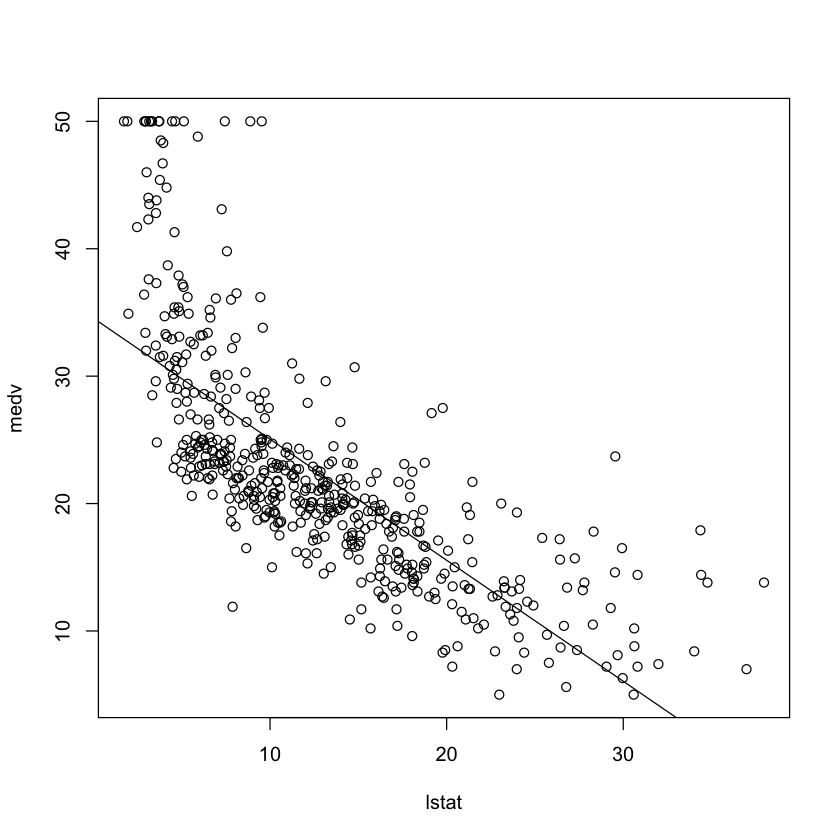

In [15]:
attach(Boston)
plot(lstat, medv)
abline(lm.fit)

### 3.6.3 Multiple Linear Regression

In [5]:
lm.fit=lm(medv~lstat+age,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


To perform a regression using all of the predictors:

In [6]:
lm.fit=lm(medv~.,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [9]:
library(car)
vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

The following syntax results in a regression using all predictors except age.

In [10]:
lm.fit1=lm(medv~.-age,data=Boston)
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

Alternatively, the update() function can be used:

In [11]:
lm.fit1=update(lm.fit, ~.-age)

### 3.6.4 Interaction Terms

In [12]:
summary(lm(medv~lstat*age,data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


### 3.6.5 Non-linear Transformations of the Predictors

In [14]:
lm.fit2=lm(medv~lstat+I(lstat^2),data=Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the **anova()** function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [15]:
lm.fit=lm(medv~lstat,data=Boston)
anova(lm.fit ,lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors lstat and $lstat^2$ is far superior to the model that only contains the predictor lstat.

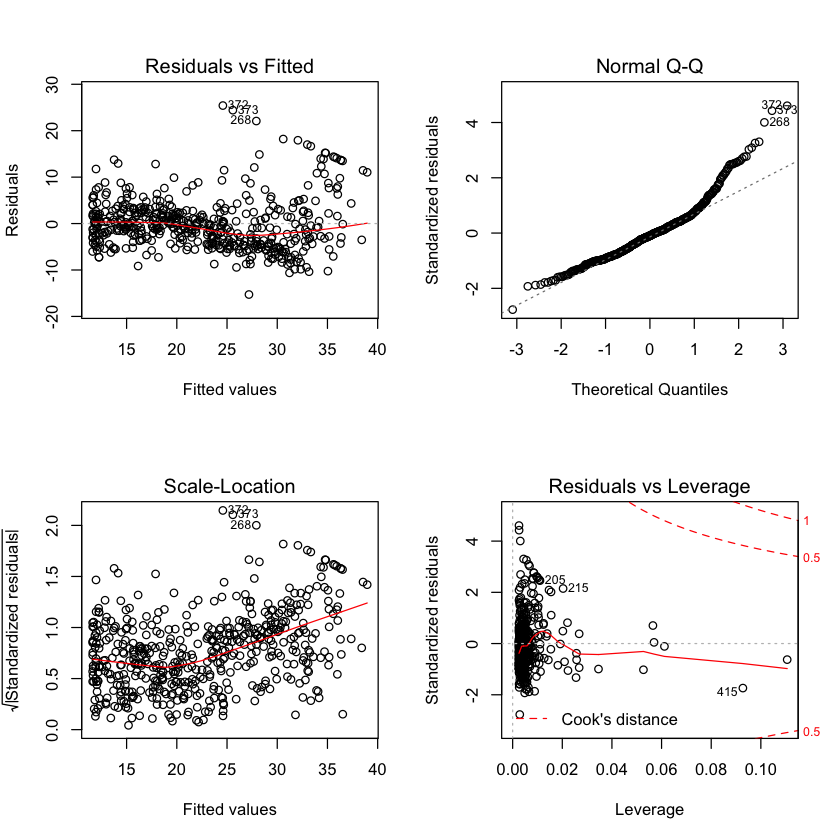

In [16]:
par(mfrow=c(2,2))
plot(lm.fit2)

In [17]:
lm.fit5=lm(medv~poly(lstat ,5),data=Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


In [18]:
summary(lm(medv~log(rm),data=Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


### 3.6.6 Qualitative Predictors

In [20]:
fix(Carseats)
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [22]:
lm.fit=lm(Sales~.+Income:Advertising+Price:Age,data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

The **contrasts()** function returns the coding that R uses for the dummy variables.

In [23]:
attach(Carseats)
contrasts (ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1
